In [1]:
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import statsmodels.api as sm
sns.set(style="whitegrid")
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFECV

from sklearn import ensemble
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv('df_model.csv')

In [3]:
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df.head()

,Country,iso3,Election_Type,Year,Voter_Turnout_Percentage,VAP_Turnout_Percentage,Compulsory_voting,Education index,Expected years of schooling (years),Exports and imports (% of GDP),"Foreign direct investment, net inflows (% of GDP)",Gross national income (GNI) per capita (2011 PPP $),Human Development Index (HDI),Income index,"Infants lacking immunization, DPT (% of one-year-olds)","Infants lacking immunization, measles (% of one-year-olds)",Life expectancy at birth (years),"Life expectancy at birth, female (years)","Life expectancy at birth, male (years)",Life expectancy index,Mean years of schooling (years),"Mortality rate, female adult (per 1,000 people)","Mortality rate, infant (per 1,000 live births)","Mortality rate, male adult (per 1,000 people)","Mortality rate, under-five (per 1,000 live births)",Old-age (65 and older) dependency ratio (per 100 people ages 15-64),Population ages 15–64 (millions),Population ages 65 and older (millions),Population under age 5 (millions),Total population (millions),Urban population (%),Young age (0-14) dependency ratio (per 100 people ages 15-64)
0,Afghanistan,AFG,1,2004,83.66,67.54,0,0.302,7.9,121.1,3.5,1064.0,0.398,0.357,28.0,52.0,57.9,59.1,56.7,0.583,2.5,263.0,81.1,307.0,114.4,4.4,12.0,0.5,4.7,24.1,22.5,95.8
1,Afghanistan,AFG,0,2005,49.37,51.71,0,0.312,8.1,104.9,4.3,1138.0,0.408,0.367,24.0,50.0,58.5,59.7,57.4,0.592,2.6,256.0,78.5,300.0,110.3,4.4,12.6,0.5,4.8,25.1,22.7,94.7
2,Afghanistan,AFG,1,2009,38.80,35.06,0,0.359,9.2,56.9,0.4,1538.0,0.453,0.413,28.0,40.0,60.8,62.0,59.6,0.627,3.1,234.0,68.2,276.0,94.1,4.6,14.0,0.6,5.1,28.0,23.5,96.2
3,Afghanistan,AFG,0,2010,35.14,29.71,0,0.371,9.5,55.0,1.2,1620.0,0.463,0.421,28.0,38.0,61.2,62.5,60.1,0.634,3.2,229.0,65.7,271.0,90.2,4.6,14.4,0.7,5.2,28.8,23.7,95.8
4,Afghanistan,AFG,1,2014,38.90,50.03,0,0.406,10.4,52.3,0.2,1854.0,0.491,0.441,27.0,40.0,62.9,64.2,61.7,0.660,3.5,211.0,56.8,253.0,76.1,4.7,17.1,0.8,5.2,32.8,24.6,86.7


In [125]:
len(df.columns)

32

In [34]:
feature_columns = ['Election_Type', 'Compulsory_voting', 'Education index',
       'Expected years of schooling (years)', 'Exports and imports (% of GDP)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Gross national income (GNI) per capita (2011 PPP $)',
       'Human Development Index (HDI)', 'Income index',
       'Infants lacking immunization, DPT (% of one-year-olds)',
       'Infants lacking immunization, measles (% of one-year-olds)',
       'Life expectancy at birth (years)',
       'Life expectancy at birth, female (years)',
       'Life expectancy at birth, male (years)', 'Life expectancy index',
       'Mean years of schooling (years)',
       'Mortality rate, female adult (per 1,000 people)',
       'Mortality rate, infant (per 1,000 live births)',
       'Mortality rate, male adult (per 1,000 people)',
       'Mortality rate, under-five (per 1,000 live births)',
       'Old-age (65 and older) dependency ratio (per 100 people ages 15-64)',
       'Population ages 15–64 (millions)',
       'Population ages 65 and older (millions)',
       'Population under age 5 (millions)', 'Total population (millions)',
       'Urban population (%)',
       'Young age (0-14) dependency ratio (per 100 people ages 15-64)']

In [61]:
feature_columns = ['Election_Type', 'Education index',
       'Expected years of schooling (years)', 'Exports and imports (% of GDP)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Gross national income (GNI) per capita (2011 PPP $)',
       'Human Development Index (HDI)', 'Income index',
       'Infants lacking immunization, DPT (% of one-year-olds)',
       'Infants lacking immunization, measles (% of one-year-olds)',
       'Life expectancy at birth (years)',
       'Life expectancy at birth, female (years)',
       'Life expectancy at birth, male (years)', 'Life expectancy index',
       'Mean years of schooling (years)',
       'Mortality rate, female adult (per 1,000 people)',
       'Mortality rate, infant (per 1,000 live births)',
       'Mortality rate, male adult (per 1,000 people)',
       'Mortality rate, under-five (per 1,000 live births)',
       'Old-age (65 and older) dependency ratio (per 100 people ages 15-64)',
       'Population ages 15–64 (millions)',
       'Population ages 65 and older (millions)',
       'Population under age 5 (millions)', 'Total population (millions)',
       'Urban population (%)',
       'Young age (0-14) dependency ratio (per 100 people ages 15-64)']

In [5]:
feature_columns = ['Education index',
 'Expected years of schooling (years)',
 'Life expectancy at birth (years)',
 'Mortality rate, female adult (per 1,000 people)',
'Mortality rate, infant (per 1,000 live births)',
'Mortality rate, male adult (per 1,000 people)','Urban population (%)']

In [62]:
len(feature_columns)

26

In [6]:
target = df['VAP_Turnout_Percentage']
features = df[feature_columns]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=34,test_size=0.2)

### Standardize Data

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
features = pd.DataFrame(data=scaler.transform(features), columns=feature_columns)
X_train =pd.DataFrame(data=scaler.transform(X_train), columns=feature_columns)
X_test =pd.DataFrame(data=scaler.transform(X_test), columns=feature_columns)

In [66]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,Election_Type,Education index,Expected years of schooling (years),Exports and imports (% of GDP),"Foreign direct investment, net inflows (% of GDP)",Gross national income (GNI) per capita (2011 PPP $),Human Development Index (HDI),Income index,"Infants lacking immunization, DPT (% of one-year-olds)","Infants lacking immunization, measles (% of one-year-olds)",Life expectancy at birth (years),"Life expectancy at birth, female (years)","Life expectancy at birth, male (years)",Life expectancy index,Mean years of schooling (years),"Mortality rate, female adult (per 1,000 people)","Mortality rate, infant (per 1,000 live births)","Mortality rate, male adult (per 1,000 people)","Mortality rate, under-five (per 1,000 live births)",Old-age (65 and older) dependency ratio (per 100 people ages 15-64),Population ages 15–64 (millions),Population ages 65 and older (millions),Population under age 5 (millions),Total population (millions),Urban population (%),Young age (0-14) dependency ratio (per 100 people ages 15-64)
Election_Type,NaN,0.211139,0.204288,0.067787,0.010215,0.244020,0.239470,0.244157,0.158593,0.139263,0.236445,0.230759,0.239097,0.236440,0.202257,0.214854,0.212918,0.219720,0.206685,0.212924,0.064463,0.097067,0.037463,0.060956,0.159211,0.220853
Education index,NaN,NaN,0.949841,0.210015,0.060449,0.695084,0.954317,0.845513,0.582476,0.640197,0.817614,0.837465,0.783007,0.817677,0.966857,0.702053,0.858435,0.570830,0.841608,0.765191,0.029541,0.227387,0.104053,0.006786,0.689011,0.868495
Expected years of schooling (years),NaN,NaN,NaN,0.164306,0.055916,0.701888,0.934805,0.843995,0.585742,0.634236,0.822803,0.833164,0.798108,0.822833,0.839694,0.690202,0.852172,0.597490,0.837577,0.737956,0.025722,0.201914,0.098004,0.004217,0.704925,0.826635
Exports and imports (% of GDP),NaN,NaN,NaN,NaN,0.353891,0.240542,0.215530,0.209047,0.163009,0.185518,0.194030,0.190716,0.196190,0.193945,0.233822,0.170570,0.222851,0.151519,0.218609,0.090167,0.257737,0.286259,0.229797,0.256925,0.148537,0.231848
"Foreign direct investment, net inflows (% of GDP)",NaN,NaN,NaN,NaN,NaN,0.050802,0.042022,0.013396,0.003065,0.017766,0.044757,0.036836,0.052536,0.044626,0.061118,0.039171,0.039125,0.056043,0.045451,0.019030,0.086647,0.097395,0.076381,0.086328,0.084051,0.047141
Gross national income (GNI) per capita (2011 PPP $),NaN,NaN,NaN,NaN,NaN,NaN,0.788603,0.863162,0.360869,0.354338,0.688291,0.667210,0.699766,0.688321,0.639940,0.580493,0.633770,0.617140,0.577909,0.660301,0.063965,0.279545,0.059588,0.045159,0.696409,0.680630
Human Development Index (HDI),NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.951408,0.598852,0.641714,0.925405,0.933225,0.902910,0.925453,0.898548,0.823856,0.923219,0.726168,0.900810,0.777849,0.046628,0.241585,0.089860,0.023452,0.770434,0.909828
Income index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.502090,0.532237,0.859842,0.861659,0.845137,0.859906,0.782939,0.762279,0.846053,0.695044,0.810079,0.733291,0.064876,0.255763,0.066989,0.042860,0.796532,0.858970
"Infants lacking immunization, DPT (% of one-year-olds)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.847316,0.615480,0.633099,0.588541,0.615533,0.533043,0.534044,0.676746,0.402158,0.699741,0.403645,0.065995,0.062472,0.169607,0.085919,0.409032,0.566780
"Infants lacking immunization, measles (% of one-year-olds)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.645959,0.671527,0.610847,0.646042,0.593902,0.579778,0.718534,0.413938,0.730983,0.397238,0.061746,0.052481,0.162573,0.081758,0.467084,0.610527


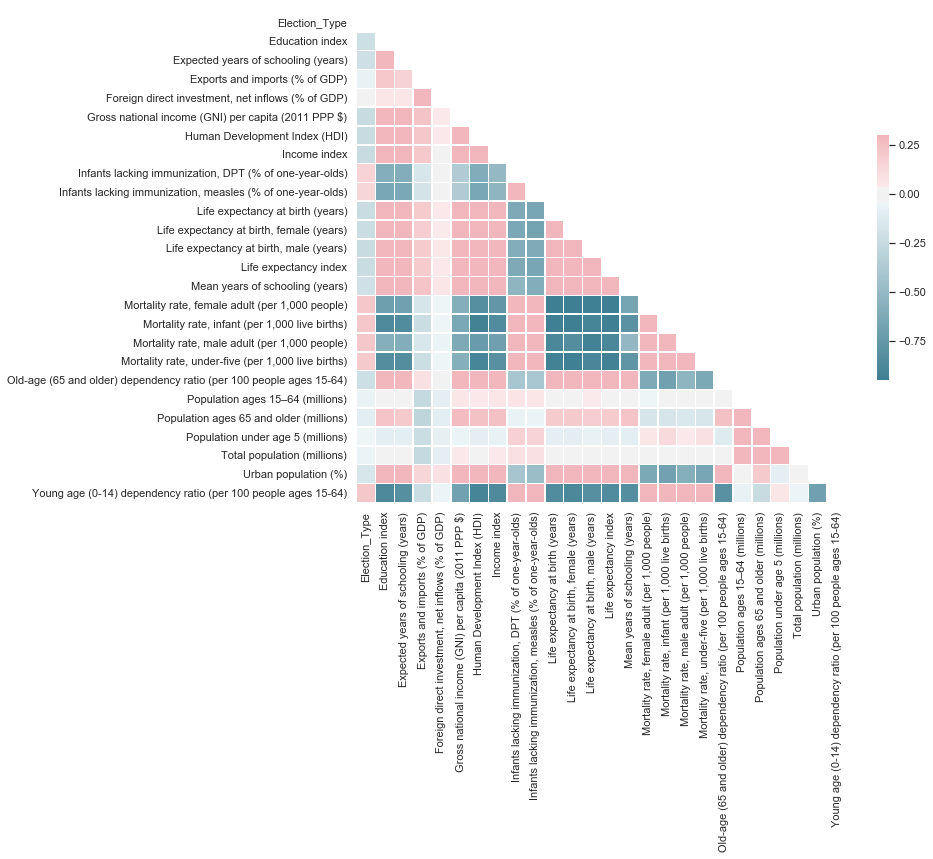

In [67]:
sns.set(style="white")


# Compute the correlation matrix
corr = X_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Feature Selection

In [68]:
len(X_train.columns)

26

In [69]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
X_train.drop(columns=to_drop, inplace=True)
X_test.drop(columns=to_drop, inplace=True)

In [70]:
len(X_train.columns)

17

In [100]:
X_train.columns

Index(['Election_Type', 'Education index',
       'Expected years of schooling (years)', 'Exports and imports (% of GDP)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Gross national income (GNI) per capita (2011 PPP $)',
       'Infants lacking immunization, DPT (% of one-year-olds)',
       'Infants lacking immunization, measles (% of one-year-olds)',
       'Life expectancy at birth (years)',
       'Mortality rate, female adult (per 1,000 people)',
       'Mortality rate, infant (per 1,000 live births)',
       'Mortality rate, male adult (per 1,000 people)',
       'Old-age (65 and older) dependency ratio (per 100 people ages 15-64)',
       'Population ages 15–64 (millions)',
       'Population ages 65 and older (millions)', 'Urban population (%)',
       'Young age (0-14) dependency ratio (per 100 people ages 15-64)'],
      dtype='object')

In [85]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=1)

selector.fit(X_train, y_train)

SelectKBest(k=1, score_func=<function f_regression at 0x1a259e17b8>)

In [86]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [87]:
list(removed_columns)

['Election_Type',
 'Education index',
 'Exports and imports (% of GDP)',
 'Foreign direct investment, net inflows (% of GDP)',
 'Gross national income (GNI) per capita (2011 PPP $)',
 'Infants lacking immunization, DPT (% of one-year-olds)',
 'Infants lacking immunization, measles (% of one-year-olds)',
 'Life expectancy at birth (years)',
 'Mortality rate, female adult (per 1,000 people)',
 'Mortality rate, infant (per 1,000 live births)',
 'Mortality rate, male adult (per 1,000 people)',
 'Old-age (65 and older) dependency ratio (per 100 people ages 15-64)',
 'Population ages 15–64 (millions)',
 'Population ages 65 and older (millions)',
 'Urban population (%)',
 'Young age (0-14) dependency ratio (per 100 people ages 15-64)']

In [88]:
list(selected_columns)

['Expected years of schooling (years)']

### Recursive Feature Selection

In [90]:
ols = linear_model.LinearRegression()

In [92]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)

RFECV(cv=5,
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
   min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
   step=1, verbose=0)

In [93]:
selected_columns = X_train.columns[selector.support_]
removed_columns = X_train.columns[~selector.support_]

In [94]:
list(removed_columns)

['Election_Type',
 'Education index',
 'Exports and imports (% of GDP)',
 'Foreign direct investment, net inflows (% of GDP)',
 'Infants lacking immunization, DPT (% of one-year-olds)',
 'Infants lacking immunization, measles (% of one-year-olds)',
 'Mortality rate, female adult (per 1,000 people)',
 'Mortality rate, male adult (per 1,000 people)',
 'Old-age (65 and older) dependency ratio (per 100 people ages 15-64)',
 'Population ages 15–64 (millions)',
 'Population ages 65 and older (millions)',
 'Urban population (%)',
 'Young age (0-14) dependency ratio (per 100 people ages 15-64)']

In [95]:
len(list(selected_columns))

4

In [96]:
list(selected_columns)

['Expected years of schooling (years)',
 'Gross national income (GNI) per capita (2011 PPP $)',
 'Life expectancy at birth (years)',
 'Mortality rate, infant (per 1,000 live births)']

In [97]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

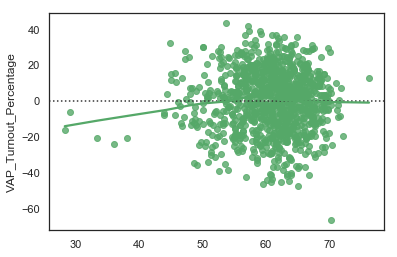

In [98]:
sns.residplot(y_train_pred, y_train, lowess=True, color="g")

,0
Gross national income (GNI) per capita (2011 PPP $),-5.661154
Education index,-3.359981
Young age (0-14) dependency ratio (per 100 people ages 15-64),-2.263424
Population ages 65 and older (millions),-2.012970
"Mortality rate, female adult (per 1,000 people)",-1.267629
"Infants lacking immunization, DPT (% of one-year-olds)",-0.741754
Old-age (65 and older) dependency ratio (per 100 people ages 15-64),-0.135152
Exports and imports (% of GDP),0.131303
Urban population (%),0.142381
"Foreign direct investment, net inflows (% of GDP)",0.656188


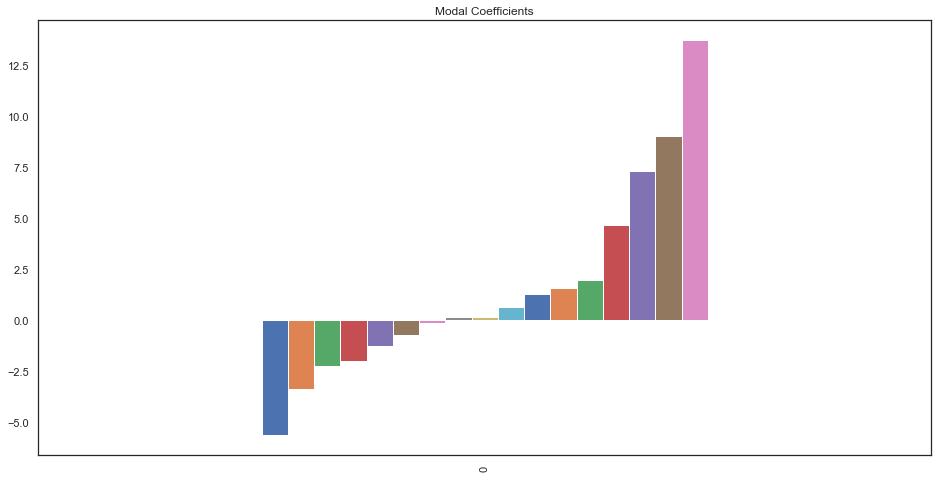

In [103]:
coef = pd.DataFrame(data=lm.coef_ ).T
coef.columns = X_train.columns

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8),)
model_coef.T

In [104]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.05, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )

Training Error: 13.990228400249986
Testing Error: 17.57905879023656


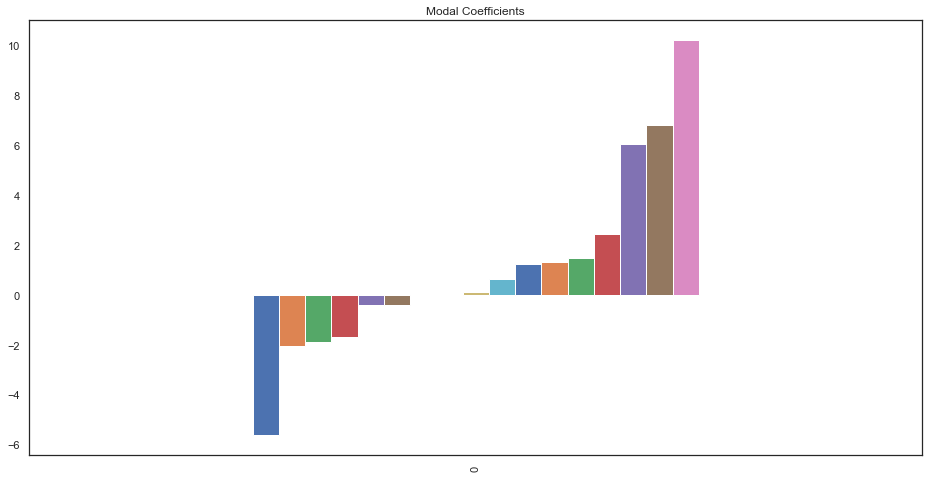

In [105]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [106]:
lasso_coef01.T

,0
Gross national income (GNI) per capita (2011 PPP $),-5.639701
Young age (0-14) dependency ratio (per 100 people ages 15-64),-2.037987
Education index,-1.883345
Population ages 65 and older (millions),-1.689935
"Infants lacking immunization, DPT (% of one-year-olds)",-0.429179
"Mortality rate, female adult (per 1,000 people)",-0.395992
Old-age (65 and older) dependency ratio (per 100 people ages 15-64),0.000000
Exports and imports (% of GDP),0.005958
Urban population (%),0.118430
"Foreign direct investment, net inflows (% of GDP)",0.620031


In [107]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )

Training Error: 13.971663274879038
Testing Error: 17.700973837316177


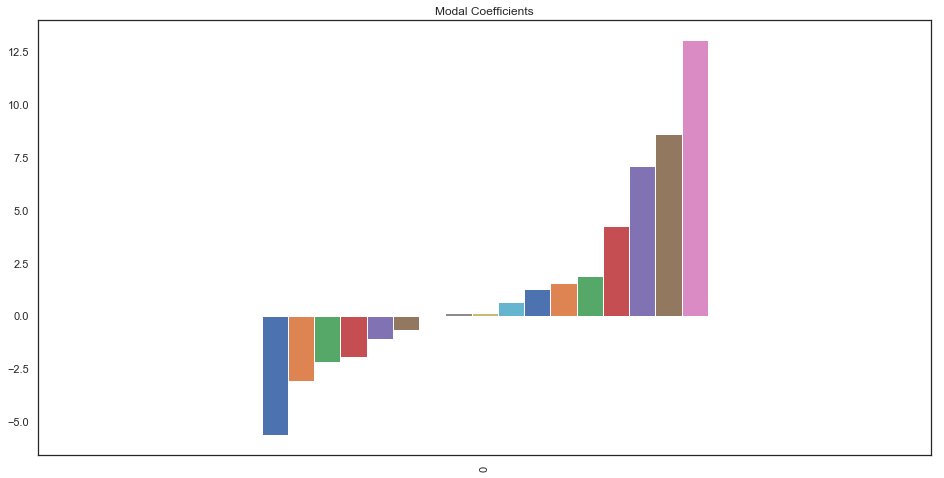

In [108]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [109]:
lasso_coef01.T

,0
Gross national income (GNI) per capita (2011 PPP $),-5.662943
Education index,-3.071387
Young age (0-14) dependency ratio (per 100 people ages 15-64),-2.182465
Population ages 65 and older (millions),-1.964164
"Mortality rate, female adult (per 1,000 people)",-1.094393
"Infants lacking immunization, DPT (% of one-year-olds)",-0.677913
Old-age (65 and older) dependency ratio (per 100 people ages 15-64),-0.053453
Exports and imports (% of GDP),0.111048
Urban population (%),0.142821
"Foreign direct investment, net inflows (% of GDP)",0.648390


In [110]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )

Training Error: 14.03238391850518
Testing Error: 17.46640059405415


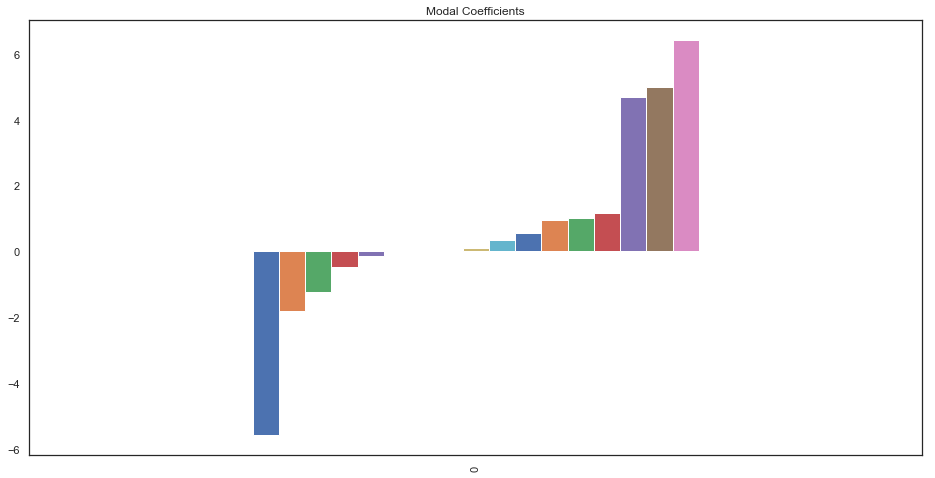

In [111]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [112]:
lasso_coef01.T

,0
Gross national income (GNI) per capita (2011 PPP $),-5.594072
Young age (0-14) dependency ratio (per 100 people ages 15-64),-1.803996
Population ages 65 and older (millions),-1.247804
Education index,-0.488957
"Infants lacking immunization, DPT (% of one-year-olds)",-0.145641
Exports and imports (% of GDP),0.000000
"Mortality rate, female adult (per 1,000 people)",-0.000000
Old-age (65 and older) dependency ratio (per 100 people ages 15-64),0.000000
Urban population (%),0.088522
"Mortality rate, male adult (per 1,000 people)",0.331902


In [113]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )

Training Error: 14.03238391850518
Testing Error: 17.46640059405415


## Multiple Linear Regression Baseline

In [158]:
X_train

,Education index,Expected years of schooling (years),Life expectancy at birth (years),"Life expectancy at birth, female (years)",Life expectancy index,Mean years of schooling (years),"Mortality rate, female adult (per 1,000 people)","Mortality rate, infant (per 1,000 live births)","Mortality rate, male adult (per 1,000 people)",Urban population (%)
0,0.261449,-0.027444,0.191520,0.060695,0.193645,0.477800,-0.254934,-0.174746,-0.610873,0.987699
1,0.705346,0.456087,0.500778,0.593912,0.498640,0.845736,-0.626255,-0.772739,-0.241396,-0.056119
2,0.433786,0.425866,0.596754,0.563730,0.595683,0.416478,-0.499463,-0.612383,-0.636650,0.955225
3,1.363358,1.060501,0.756715,0.734762,0.762044,1.489623,-0.590029,-0.766057,-0.696798,0.996977
4,-1.091131,-0.903844,0.031559,0.000331,0.027284,-1.177910,0.016764,0.135943,-0.172656,-0.603544
5,-0.589789,-0.601637,-0.501644,-0.593250,-0.499525,-0.534023,0.496765,0.252869,0.231191,-1.067463
6,1.102242,1.241825,0.969996,0.925915,0.969995,0.907058,-0.771161,-0.829531,-1.006127,0.992338
7,1.358136,1.332487,1.193942,1.046644,1.191809,1.244333,-0.834557,-0.879642,-1.298272,1.363474
8,0.757569,0.969839,0.746051,0.744823,0.741249,0.508462,-0.698708,-0.826191,-0.671020,0.778935
9,-0.668123,-0.722520,-2.559808,-2.514844,-2.551307,-0.564684,3.748090,2.030143,3.513522,-1.016432


In [160]:
X_test

,Education index,Expected years of schooling (years),Life expectancy at birth (years),"Life expectancy at birth, female (years)",Life expectancy index,Mean years of schooling (years),"Mortality rate, female adult (per 1,000 people)","Mortality rate, infant (per 1,000 live births)","Mortality rate, male adult (per 1,000 people)",Urban population (%)
0,1.321580,1.392928,0.831364,0.785065,0.838293,1.152349,-0.644368,-0.779420,-0.894425,1.335638
1,-2.574269,-2.898410,-2.143910,-2.233145,-2.149268,-2.067087,1.185068,2.350854,0.695185,-1.893239
2,0.073446,0.123659,-0.405668,-0.331672,-0.402481,0.017881,0.134500,0.543513,0.171044,-0.362306
3,0.073446,-0.269210,-0.149730,-0.070094,-0.152940,0.324494,0.007708,-0.127976,0.377263,-0.529316
4,-0.521898,-0.782961,0.660739,0.624094,0.665000,-0.288732,-0.590029,-0.532205,-0.808500,-0.320553
5,1.170133,0.939618,0.138200,0.443002,0.145123,1.274994,-0.327387,-0.869620,0.927183,0.825327
6,0.308450,0.516528,0.436793,0.493305,0.429323,0.109865,-0.436066,-0.565613,-0.198433,-0.710245
7,0.083890,0.063218,-0.352347,-0.432279,-0.353959,0.109865,0.578274,0.135943,0.231191,1.470175
8,0.538232,0.153880,0.042223,0.060695,0.041148,0.815075,-0.110028,-0.505479,0.007786,-0.543234
9,0.982129,0.848956,0.842028,0.855490,0.845225,0.999042,-0.825501,-0.869620,-0.791315,-0.046841


In [161]:
y_train

623      26.56
1054     44.12
932      89.58
1232     34.74
529      67.98
712      35.29
211      57.06
839      34.68
442      56.12
1275     35.46
547      63.36
699      48.04
474      79.59
234      81.91
745      95.93
800      51.77
445      42.02
404      72.26
151      59.32
208      50.25
784      70.03
1134     79.04
842      36.35
1283     51.19
1290     45.53
1202     55.32
4        50.03
1059     57.85
1219     24.08
283      66.09
310      81.34
1110     30.97
966      44.22
318      48.78
469      83.88
973      41.55
1015     27.54
793      67.86
1279     34.18
645      54.49
353      47.14
340      70.28
1143     79.13
853      76.25
27       79.77
87       40.48
893      43.40
621      51.97
1167     53.21
1119     38.05
935      68.35
309      46.37
1249     93.14
1012     66.11
1089     45.67
857      80.82
116      86.00
8        67.30
1074     54.09
539      69.43
193      58.69
1132     39.59
374      22.34
32       72.99
1213     62.73
167      77.29
754      4

In [114]:
X = df[['Election_Type',
 'Year',
 'Compulsory_voting',
 'Education index',
 'Expected years of schooling (years)',
 'Exports and imports (% of GDP)',
 'Foreign direct investment, net inflows (% of GDP)',
 'Gross national income (GNI) per capita (2011 PPP $)',
 'Human Development Index (HDI)',
 'Income index',
 'Infants lacking immunization, DPT (% of one-year-olds)',
 'Infants lacking immunization, measles (% of one-year-olds)',
 'Life expectancy at birth (years)',
 'Life expectancy at birth, female (years)',
 'Life expectancy at birth, male (years)',
 'Life expectancy index',
 'Mean years of schooling (years)',
 'Mortality rate, female adult (per 1,000 people)',
 'Mortality rate, infant (per 1,000 live births)',
 'Mortality rate, male adult (per 1,000 people)',
 'Mortality rate, under-five (per 1,000 live births)',
 'Old-age (65 and older) dependency ratio (per 100 people ages 15-64)',
 'Population ages 15–64 (millions)',
 'Population ages 65 and older (millions)',
 'Population under age 5 (millions)',
 'Total population (millions)',
 'Urban population (%)',
 'Young age (0-14) dependency ratio (per 100 people ages 15-64)']]
y = target

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     VAP_Turnout_Percentage   R-squared:                       0.934
Model:                                OLS   Adj. R-squared:                  0.933
Method:                     Least Squares   F-statistic:                     642.0
Date:                    Wed, 31 Jul 2019   Prob (F-statistic):               0.00
Time:                            14:21:43   Log-Likelihood:                -5440.6
No. Observations:                    1293   AIC:                         1.094e+04
Df Residuals:                        1265   BIC:                         1.108e+04
Df Model:                              28                                         
Covariance Type:                nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
Election_Type                                                           3.7878      1.047      3.616      0.000       1.733       5.843
Year                                                                   -0.4714      0.068     -6.927      0.000      -0.605      -0.338
Compulsory_voting                                                       5.6527      1.475      3.833      0.000       2.759       8.546
Education index                                                      -489.7712    115.072     -4.256      0.000    -715.524    -264.019
Expected years of schooling (years)                                     8.7800      2.557      3.434      0.001       3.764      13.796
Exports and imports (% of GDP)                                          0.0126      0.012      1.021      0.308      -0.012       0.037
Foreign direct investment, net inflows (% of GDP)                       0.0910      0.057      1.599      0.110      -0.021       0.203
Gross national income (GNI) per capita (2011 PPP $)                    -0.0002   8.27e-05     -2.470      0.014      -0.000    -4.2e-05
Human Development Index (HDI)                                         609.9665    128.264      4.756      0.000     358.333     861.600
Income index                                                         -215.9170     44.479     -4.854      0.000    -303.178    -128.656
Infants lacking immunization, DPT (% of one-year-olds)                  0.0760      0.095      0.800      0.424      -0.110       0.262
Infants lacking immunization, measles (% of one-year-olds)             -0.0034      0.066     -0.051      0.959      -0.133       0.127
Life expectancy at birth (years)                                       31.7979      9.151      3.475      0.001      13.845      49.751
Life expectancy at birth, female (years)                               10.5745      3.487      3.033      0.002       3.734      17.415
Life expectancy at birth, male (years)                                  7.5289      3.330      2.261      0.024       0.996      14.062
Life expectancy index                                               -3420.9012    443.522     -7.713      0.000   -4291.021   -2550.781
Mean years of schooling (years)                                         8.7640      3.222      2.720      0.007       2.443      15.085
Mortality rate, female adult (per 1,000 people)                         0.0713      0.038      1.897      0.058      -0.002       0.145
Mortality rate, infant (per 1,000 live births)                          0.1834      0.096      1.920      0.055      -0.004       0.371
Mortality rate, male adult (per 1,000 people)  

In [115]:
X = df[['Election_Type',
 'Year',
 'Compulsory_voting',
 'Education index',
 'Expected years of schooling (years)',
 'Gross national income (GNI) per capita (2011 PPP $)',
 'Human Development Index (HDI)',
 'Income index',
 'Life expectancy at birth (years)',
 'Life expectancy at birth, female (years)',
 'Life expectancy at birth, male (years)',
 'Life expectancy index',
 'Mean years of schooling (years)',
 'Mortality rate, male adult (per 1,000 people)',
 'Population ages 65 and older (millions)',
 'Urban population (%)']]
y = target

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     VAP_Turnout_Percentage   R-squared:                       0.932
Model:                                OLS   Adj. R-squared:                  0.931
Method:                     Least Squares   F-statistic:                     1098.
Date:                    Wed, 31 Jul 2019   Prob (F-statistic):               0.00
Time:                            14:26:34   Log-Likelihood:                -5460.3
No. Observations:                    1293   AIC:                         1.095e+04
Df Residuals:                        1277   BIC:                         1.104e+04
Df Model:                              16                                         
Covariance Type:                nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Election_Type                                           3.4960      1.050      3.328      0.001       1.435       5.557
Year                                                   -0.4526      0.066     -6.898      0.000      -0.581      -0.324
Compulsory_voting                                       6.2528      1.376      4.543      0.000       3.553       8.953
Education index                                      -557.8564    114.227     -4.884      0.000    -781.951    -333.762
Expected years of schooling (years)                     9.7598      2.543      3.839      0.000       4.772      14.748
Gross national income (GNI) per capita (2011 PPP $)    -0.0001   7.56e-05     -1.817      0.069      -0.000    1.09e-05
Human Development Index (HDI)                         699.0345    122.739      5.695      0.000     458.242     939.827
Income index                                         -248.6987     42.548     -5.845      0.000    -332.171    -165.226
Life expectancy at birth (years)                       39.3687      8.237      4.779      0.000      23.208      55.529
Life expectancy at birth, female (years)                5.9767      2.926      2.042      0.041       0.236      11.717
Life expectancy at birth, male (years)                  4.4084      3.009      1.465      0.143      -1.494      10.311
Life expectancy index                               -3468.0665    420.994     -8.238      0.000   -4293.983   -2642.150
Mean years of schooling (years)                         9.9866      3.197      3.124      0.002       3.715      16.258
Mortality rate, male adult (per 1,000 people)          -0.0522      0.016     -3.301      0.001      -0.083      -0.021
Population ages 65 and older (millions)                -0.0232      0.073     -0.317      0.751      -0.167       0.120
Urban population (%)                                   -0.1129      0.038     -2.976      0.003      -0.187      -0.038
==============================================================================
Omnibus:                        7.667   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.733
Skew:                          -0.189   Prob(JB):                       0.0209
Kurtosis:                       2.979   Cond. No.                     1.94e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [164]:
X = df[['Education index',
 'Expected years of schooling (years)',
 'Life expectancy at birth (years)',
 'Mortality rate, female adult (per 1,000 people)',
'Mortality rate, infant (per 1,000 live births)',
'Mortality rate, male adult (per 1,000 people)','Urban population (%)']]
y = target

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     VAP_Turnout_Percentage   R-squared:                       0.922
Model:                                OLS   Adj. R-squared:                  0.922
Method:                     Least Squares   F-statistic:                     2179.
Date:                    Wed, 31 Jul 2019   Prob (F-statistic):               0.00
Time:                            17:39:56   Log-Likelihood:                -5549.1
No. Observations:                    1293   AIC:                         1.111e+04
Df Residuals:                        1286   BIC:                         1.115e+04
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Education index                                   -24.8368      9.091     -2.732      0.006     -42.671      -7.002
Expected years of schooling (years)                 2.4046      0.523      4.601      0.000       1.379       3.430
Life expectancy at birth (years)                    0.6388      0.060     10.700      0.000       0.522       0.756
Mortality rate, female adult (per 1,000 people)    -0.0454      0.016     -2.856      0.004      -0.077      -0.014
Mortality rate, infant (per 1,000 live births)      0.1938      0.041      4.703      0.000       0.113       0.275
Mortality rate, male adult (per 1,000 people)       0.0358      0.011      3.281      0.001       0.014       0.057
Urban population (%)                               -0.0984      0.034     -2.918      0.004      -0.165      -0.032
==============================================================================
Omnibus:                       21.966   Durbin-Watson:                   0.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.920
Skew:                          -0.274   Prob(JB):                     2.87e-05
Kurtosis:                       2.702   Cond. No.                     5.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
X_train.head()

,Education index,Expected years of schooling (years),Life expectancy at birth (years),"Mortality rate, female adult (per 1,000 people)","Mortality rate, infant (per 1,000 live births)","Mortality rate, male adult (per 1,000 people)",Urban population (%)
0,0.261449,-0.027444,0.191520,-0.254934,-0.174746,-0.610873,0.987699
1,0.705346,0.456087,0.500778,-0.626255,-0.772739,-0.241396,-0.056119
2,0.433786,0.425866,0.596754,-0.499463,-0.612383,-0.636650,0.955225
3,1.363358,1.060501,0.756715,-0.590029,-0.766057,-0.696798,0.996977
4,-1.091131,-0.903844,0.031559,0.016764,0.135943,-0.172656,-0.603544


In [16]:
y_train = y_train.reset_index()

In [18]:
y_train = y_train.drop(columns='index')

In [19]:
X = X_train
y = y_train

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     VAP_Turnout_Percentage   R-squared:                       0.004
Model:                                OLS   Adj. R-squared:                 -0.003
Method:                     Least Squares   F-statistic:                    0.5671
Date:                    Thu, 01 Aug 2019   Prob (F-statistic):              0.783
Time:                            09:18:10   Log-Likelihood:                -5754.7
No. Observations:                    1034   AIC:                         1.152e+04
Df Residuals:                        1027   BIC:                         1.156e+04
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Education index                                    -5.5028      6.930     -0.794      0.427     -19.102       8.096
Expected years of schooling (years)                 7.4609      7.003      1.065      0.287      -6.281      21.203
Life expectancy at birth (years)                   10.6158     13.670      0.777      0.438     -16.208      37.440
Mortality rate, female adult (per 1,000 people)    -5.9705      7.576     -0.788      0.431     -20.837       8.896
Mortality rate, infant (per 1,000 live births)      8.2635      7.718      1.071      0.285      -6.880      23.407
Mortality rate, male adult (per 1,000 people)       7.6737      6.663      1.152      0.250      -5.400      20.748
Urban population (%)                               -1.5766      2.935     -0.537      0.591      -7.336       4.183
==============================================================================
Omnibus:                       19.222   Durbin-Watson:                   0.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.896
Skew:                          -0.301   Prob(JB):                     7.88e-05
Kurtosis:                       2.724   Cond. No.                         18.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
X = df[['Education index',
 'Expected years of schooling (years)',
 'Human Development Index (HDI)',
 'Income index',
 'Life expectancy at birth (years)',
 'Life expectancy at birth, female (years)',
 'Life expectancy index',
 'Mean years of schooling (years)',
 'Mortality rate, male adult (per 1,000 people)',
 'Urban population (%)']]
y = target

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     VAP_Turnout_Percentage   R-squared:                       0.932
Model:                                OLS   Adj. R-squared:                  0.931
Method:                     Least Squares   F-statistic:                     1347.
Date:                    Wed, 31 Jul 2019   Prob (F-statistic):               0.00
Time:                            14:34:10   Log-Likelihood:                -5463.4
No. Observations:                    1293   AIC:                         1.095e+04
Df Residuals:                        1280   BIC:                         1.102e+04
Df Model:                              13                                         
Covariance Type:                nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Election_Type                                     3.5001      1.050      3.332      0.001       1.440       5.561
Year                                             -0.4343      0.065     -6.686      0.000      -0.562      -0.307
Compulsory_voting                                 6.9715      1.346      5.178      0.000       4.330       9.613
Education index                                -594.0764    113.391     -5.239      0.000    -816.528    -371.625
Expected years of schooling (years)               9.8495      2.535      3.885      0.000       4.875      14.824
Human Development Index (HDI)                   769.2000    118.262      6.504      0.000     537.192    1001.208
Income index                                   -282.4913     39.073     -7.230      0.000    -359.145    -205.838
Life expectancy at birth (years)                 45.9616      6.589      6.975      0.000      33.035      58.888
Life expectancy at birth, female (years)          2.2689      0.690      3.289      0.001       0.916       3.622
Life expectancy index                         -3389.3227    417.646     -8.115      0.000   -4208.668   -2569.977
Mean years of schooling (years)                  10.2787      3.187      3.225      0.001       4.027      16.531
Mortality rate, male adult (per 1,000 people)    -0.0535      0.016     -3.389      0.001      -0.084      -0.023
Urban population (%)                             -0.1212      0.038     -3.208      0.001      -0.195      -0.047
==============================================================================
Omnibus:                        6.117   Durbin-Watson:                   1.007
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                6.170
Skew:                          -0.168   Prob(JB):                       0.0457
Kurtosis:                       2.965   Cond. No.                     1.82e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
# 20 trees
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [183]:
# 7 features, 20 trees
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [184]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 12.04593023993381
Mean Squared Error: 248.40438786979732
Root Mean Squared Error: 15.760849846051999


In [131]:
# Results from 13 selected features by ols, low p_value, 20 trees
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 11.324922177790034
Mean Squared Error: 212.07108989037883
Root Mean Squared Error: 14.562660810798926


In [185]:
# 1000 Trees!
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [186]:
# 7 features, 1000 trees
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 11.69004777057668
Mean Squared Error: 227.51615061927524
Root Mean Squared Error: 15.083638507312326


In [133]:
# Results from 13 selected features by ols, low p_value, 1000 trees
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10.92440768744257
Mean Squared Error: 188.58460784080856
Root Mean Squared Error: 13.73261110789964


In [178]:
X_train.columns

Index(['Education index', 'Expected years of schooling (years)',
       'Life expectancy at birth (years)',
       'Life expectancy at birth, female (years)', 'Life expectancy index',
       'Mean years of schooling (years)',
       'Mortality rate, female adult (per 1,000 people)',
       'Mortality rate, infant (per 1,000 live births)',
       'Mortality rate, male adult (per 1,000 people)',
       'Urban population (%)'],
      dtype='object')

In [187]:
feature_importances = pd.DataFrame(regressor.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance') 

In [188]:
feature_importances

,importance
Life expectancy at birth (years),0.092411
"Mortality rate, female adult (per 1,000 people)",0.105045
Expected years of schooling (years),0.112237
"Mortality rate, infant (per 1,000 live births)",0.113982
"Mortality rate, male adult (per 1,000 people)",0.138534
Education index,0.170463
Urban population (%),0.267327


### Gradient Boost

In [137]:
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [189]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)
print('MAE: %.4f' % mae)
print('RMSE: %.4f' % rmse)

MSE: 237.3988


NameError: name 'mae' is not defined

Text(0, 0.5, 'Deviance')

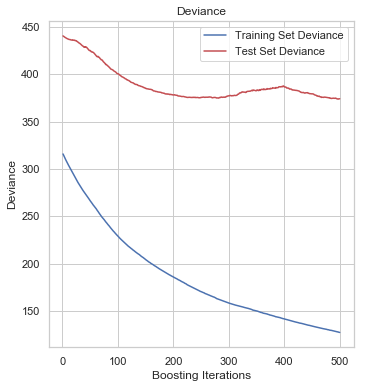

In [139]:
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

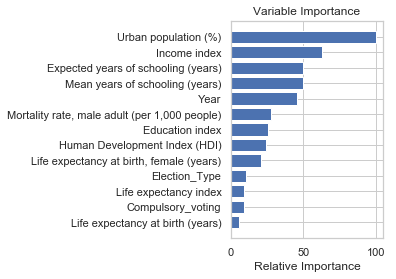

In [140]:
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [143]:
df.head()

,Country,iso3,Election_Type,Year,Voter_Turnout_Percentage,VAP_Turnout_Percentage,Compulsory_voting,Education index,Expected years of schooling (years),Exports and imports (% of GDP),"Foreign direct investment, net inflows (% of GDP)",Gross national income (GNI) per capita (2011 PPP $),Human Development Index (HDI),Income index,"Infants lacking immunization, DPT (% of one-year-olds)","Infants lacking immunization, measles (% of one-year-olds)",Life expectancy at birth (years),"Life expectancy at birth, female (years)","Life expectancy at birth, male (years)",Life expectancy index,Mean years of schooling (years),"Mortality rate, female adult (per 1,000 people)","Mortality rate, infant (per 1,000 live births)","Mortality rate, male adult (per 1,000 people)","Mortality rate, under-five (per 1,000 live births)",Old-age (65 and older) dependency ratio (per 100 people ages 15-64),Population ages 15–64 (millions),Population ages 65 and older (millions),Population under age 5 (millions),Total population (millions),Urban population (%),Young age (0-14) dependency ratio (per 100 people ages 15-64)
0,Afghanistan,AFG,1,2004,83.66,67.54,0,0.302,7.9,121.1,3.5,1064.0,0.398,0.357,28.0,52.0,57.9,59.1,56.7,0.583,2.5,263.0,81.1,307.0,114.4,4.4,12.0,0.5,4.7,24.1,22.5,95.8
1,Afghanistan,AFG,0,2005,49.37,51.71,0,0.312,8.1,104.9,4.3,1138.0,0.408,0.367,24.0,50.0,58.5,59.7,57.4,0.592,2.6,256.0,78.5,300.0,110.3,4.4,12.6,0.5,4.8,25.1,22.7,94.7
2,Afghanistan,AFG,1,2009,38.80,35.06,0,0.359,9.2,56.9,0.4,1538.0,0.453,0.413,28.0,40.0,60.8,62.0,59.6,0.627,3.1,234.0,68.2,276.0,94.1,4.6,14.0,0.6,5.1,28.0,23.5,96.2
3,Afghanistan,AFG,0,2010,35.14,29.71,0,0.371,9.5,55.0,1.2,1620.0,0.463,0.421,28.0,38.0,61.2,62.5,60.1,0.634,3.2,229.0,65.7,271.0,90.2,4.6,14.4,0.7,5.2,28.8,23.7,95.8
4,Afghanistan,AFG,1,2014,38.90,50.03,0,0.406,10.4,52.3,0.2,1854.0,0.491,0.441,27.0,40.0,62.9,64.2,61.7,0.660,3.5,211.0,56.8,253.0,76.1,4.7,17.1,0.8,5.2,32.8,24.6,86.7


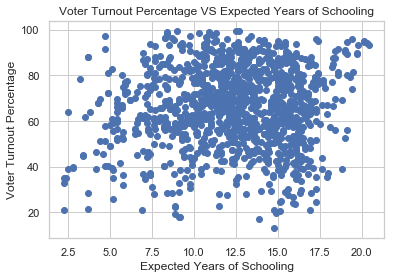

In [145]:
plt.scatter(df['Expected years of schooling (years)'], df['Voter_Turnout_Percentage'])
plt.title("Voter Turnout Percentage VS Expected Years of Schooling")
plt.xlabel("Expected Years of Schooling")
plt.ylabel("Voter Turnout Percentage")
plt.show();

In [148]:
df.columns

Index(['Country', 'iso3', 'Election_Type', 'Year', 'Voter_Turnout_Percentage',
       'VAP_Turnout_Percentage', 'Compulsory_voting', 'Education index',
       'Expected years of schooling (years)', 'Exports and imports (% of GDP)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Gross national income (GNI) per capita (2011 PPP $)',
       'Human Development Index (HDI)', 'Income index',
       'Infants lacking immunization, DPT (% of one-year-olds)',
       'Infants lacking immunization, measles (% of one-year-olds)',
       'Life expectancy at birth (years)',
       'Life expectancy at birth, female (years)',
       'Life expectancy at birth, male (years)', 'Life expectancy index',
       'Mean years of schooling (years)',
       'Mortality rate, female adult (per 1,000 people)',
       'Mortality rate, infant (per 1,000 live births)',
       'Mortality rate, male adult (per 1,000 people)',
       'Mortality rate, under-five (per 1,000 live births)',
       'Old-ag

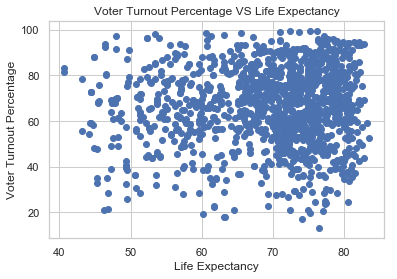

In [149]:
plt.scatter(df['Life expectancy at birth (years)'], df['Voter_Turnout_Percentage'])
plt.title("Voter Turnout Percentage VS Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Voter Turnout Percentage")
plt.show();

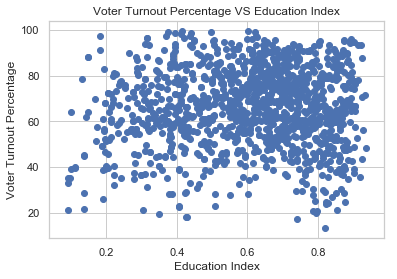

In [150]:
plt.scatter(df['Education index'], df['Voter_Turnout_Percentage'])
plt.title("Voter Turnout Percentage VS Education Index")
plt.xlabel("Education Index")
plt.ylabel("Voter Turnout Percentage")
plt.show();

In [190]:
df.columns

Index(['Country', 'iso3', 'Election_Type', 'Year', 'Voter_Turnout_Percentage',
       'VAP_Turnout_Percentage', 'Compulsory_voting', 'Education index',
       'Expected years of schooling (years)', 'Exports and imports (% of GDP)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Gross national income (GNI) per capita (2011 PPP $)',
       'Human Development Index (HDI)', 'Income index',
       'Infants lacking immunization, DPT (% of one-year-olds)',
       'Infants lacking immunization, measles (% of one-year-olds)',
       'Life expectancy at birth (years)',
       'Life expectancy at birth, female (years)',
       'Life expectancy at birth, male (years)', 'Life expectancy index',
       'Mean years of schooling (years)',
       'Mortality rate, female adult (per 1,000 people)',
       'Mortality rate, infant (per 1,000 live births)',
       'Mortality rate, male adult (per 1,000 people)',
       'Mortality rate, under-five (per 1,000 live births)',
       'Old-ag

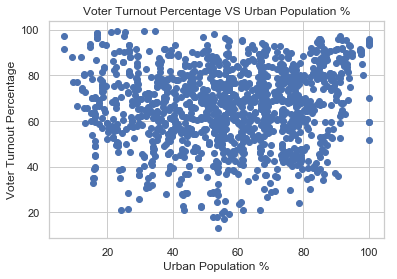

In [192]:
plt.scatter(df['Urban population (%)'], df['Voter_Turnout_Percentage'])
plt.title("Voter Turnout Percentage VS Urban Population %")
plt.xlabel("Urban Population %")
plt.ylabel("Voter Turnout Percentage")
plt.show();

In [193]:
df.columns

Index(['Country', 'iso3', 'Election_Type', 'Year', 'Voter_Turnout_Percentage',
       'VAP_Turnout_Percentage', 'Compulsory_voting', 'Education index',
       'Expected years of schooling (years)', 'Exports and imports (% of GDP)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Gross national income (GNI) per capita (2011 PPP $)',
       'Human Development Index (HDI)', 'Income index',
       'Infants lacking immunization, DPT (% of one-year-olds)',
       'Infants lacking immunization, measles (% of one-year-olds)',
       'Life expectancy at birth (years)',
       'Life expectancy at birth, female (years)',
       'Life expectancy at birth, male (years)', 'Life expectancy index',
       'Mean years of schooling (years)',
       'Mortality rate, female adult (per 1,000 people)',
       'Mortality rate, infant (per 1,000 live births)',
       'Mortality rate, male adult (per 1,000 people)',
       'Mortality rate, under-five (per 1,000 live births)',
       'Old-ag

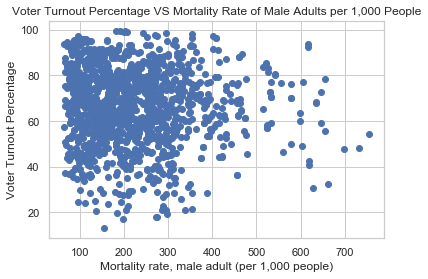

In [194]:
plt.scatter(df['Mortality rate, male adult (per 1,000 people)'], df['Voter_Turnout_Percentage'])
plt.title("Voter Turnout Percentage VS Mortality Rate of Male Adults per 1,000 People")
plt.xlabel("Mortality rate, male adult (per 1,000 people)")
plt.ylabel("Voter Turnout Percentage")
plt.show();